In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
academic_level_data=pd.read_csv("student-mat.csv", delimiter=";")
academic_level_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
academic_level_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
academic_level_data.shape

(395, 33)

In [6]:
from enum import Enum
class ColumnType(Enum):
    ABSOLUTE = 1
    ORDER = 2
    NAME = 3

In [7]:
categorical_columns = academic_level_data.columns[academic_level_data.dtypes == 'object']
colunm_type_map = dict()
for column in categorical_columns:
    colunm_type_map[column] = ColumnType.NAME

colunm_type_map['age'] = ColumnType.ABSOLUTE
# colunm_type_map['falures'] = ColumnType.ABSOLUTE
colunm_type_map['absences'] = ColumnType.ABSOLUTE

for column_name in academic_level_data:
    if colunm_type_map.get(column_name) is None:
        colunm_type_map[column_name] = ColumnType.ORDER
colunm_type_map

{'school': <ColumnType.NAME: 3>,
 'sex': <ColumnType.NAME: 3>,
 'address': <ColumnType.NAME: 3>,
 'famsize': <ColumnType.NAME: 3>,
 'Pstatus': <ColumnType.NAME: 3>,
 'Mjob': <ColumnType.NAME: 3>,
 'Fjob': <ColumnType.NAME: 3>,
 'reason': <ColumnType.NAME: 3>,
 'guardian': <ColumnType.NAME: 3>,
 'schoolsup': <ColumnType.NAME: 3>,
 'famsup': <ColumnType.NAME: 3>,
 'paid': <ColumnType.NAME: 3>,
 'activities': <ColumnType.NAME: 3>,
 'nursery': <ColumnType.NAME: 3>,
 'higher': <ColumnType.NAME: 3>,
 'internet': <ColumnType.NAME: 3>,
 'romantic': <ColumnType.NAME: 3>,
 'age': <ColumnType.ABSOLUTE: 1>,
 'absences': <ColumnType.ABSOLUTE: 1>,
 'Medu': <ColumnType.ORDER: 2>,
 'Fedu': <ColumnType.ORDER: 2>,
 'traveltime': <ColumnType.ORDER: 2>,
 'studytime': <ColumnType.ORDER: 2>,
 'failures': <ColumnType.ORDER: 2>,
 'famrel': <ColumnType.ORDER: 2>,
 'freetime': <ColumnType.ORDER: 2>,
 'goout': <ColumnType.ORDER: 2>,
 'Dalc': <ColumnType.ORDER: 2>,
 'Walc': <ColumnType.ORDER: 2>,
 'health': <Colu

In [8]:
def calcDiffMatrix(data, column_type_map):
    matrix = np.zeros((data.shape[0], data.shape[0]))
    # print("here")
    for i, row1 in data[:-1].iterrows():
        print(i)
        for j, row2 in data[i+1:].iterrows():
            if j != i:
                matrix[j, i] = matrix[i, j] = calcObjectsDiff(row1, row2, data, column_type_map)
            # print(i, ' diff beetwen obj_i = ', i, 'and obj_j = ', j, ' = ', matrix[i,j])
    return matrix
            
def calcObjectsDiff(obj1, obj2, data, column_type_map):
    diff = 0
    for i, column_name in enumerate(data):
        if column_type_map[column_name] == ColumnType.NAME:
            diff += calcNameColumnDiff(obj1[i], obj2[i], data[column_name]) ** 2
        elif column_type_map[column_name] == ColumnType.ORDER:
            diff += calcOrderColumnDiff(obj1[i], obj2[i], data[column_name]) ** 2
        elif column_type_map[column_name] == ColumnType.ABSOLUTE:
            diff += calcAbsoluteColumnDiff(obj1[i], obj2[i], data[column_name]) ** 2
    return np.sqrt(diff)/np.sqrt(data.shape[1])

def calcNameColumnDiff(obj1_data, obj2_data, column_data):
    return calcNotNormolizedNameDiff(obj1_data, obj2_data, column_data) / len(column_data) 

def calcNotNormolizedNameDiff(obj1_data, obj2_data, column_data):
    diff = 0
    for value in column_data:
        if obj1_data != value == obj2_data or obj1_data == value != obj2_data:
            diff += 1
    return diff

def calcOrderColumnDiff(obj1_data, obj2_data, column_data):
    diff = 0
    for value in column_data:
        if obj1_data > value > obj2_data or obj1_data < value < obj2_data:
            diff += 1
        elif obj1_data == value != obj2_data or obj1_data != value == obj2_data:
            diff += 0.5
    return diff/(len(column_data) - 1)

def calcAbsoluteColumnDiff(obj1_data, obj2_data, column_data):
    return np.abs(obj1_data - obj2_data) / (np.max(column_data) - np.min(column_data))

In [9]:
diff_matrix = calcDiffMatrix(academic_level_data, colunm_type_map)
diff_matrix

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([[0.        , 0.48781664, 0.47301452, ..., 0.56620388, 0.58736691,
        0.5464032 ],
       [0.48781664, 0.        , 0.46978449, ..., 0.46851523, 0.52237332,
        0.47289287],
       [0.47301452, 0.46978449, 0.        , ..., 0.56779788, 0.50739624,
        0.4618352 ],
       ...,
       [0.56620388, 0.46851523, 0.56779788, ..., 0.        , 0.39171992,
        0.43882501],
       [0.58736691, 0.52237332, 0.50739624, ..., 0.39171992, 0.        ,
        0.39803261],
       [0.5464032 , 0.47289287, 0.4618352 , ..., 0.43882501, 0.39803261,
        0.        ]])

In [10]:
diff_matrix[27, 116]



0.47403922809469545

In [11]:
for i in academic_level_data.values:
    if i[-1] == 19:
        print(i)

['GP' 'M' 15 'U' 'LE3' 'A' 3 2 'services' 'other' 'home' 'mother' 1 2 0
 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 4 2 2 1 1 1 0 16 18 19]
['GP' 'M' 15 'U' 'LE3' 'A' 4 4 'teacher' 'teacher' 'course' 'mother' 1 1 0
 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'no' 5 5 3 1 1 4 6 18 19 19]
['GP' 'M' 15 'U' 'LE3' 'T' 4 2 'teacher' 'other' 'course' 'mother' 1 1 0
 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 3 5 2 1 1 3 10 18 19 19]
['GP' 'F' 18 'U' 'GT3' 'T' 2 2 'at_home' 'at_home' 'other' 'mother' 1 3 0
 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 4 3 3 1 2 2 5 18 18 19]
['MS' 'F' 18 'R' 'LE3' 'T' 4 4 'other' 'other' 'reputation' 'mother' 2 3 0
 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 5 4 4 1 1 1 0 19 18 19]


In [12]:
#Выираем учеников с оценкой, которую считаем средней по кластеру
# G3 == 0
print(academic_level_data.values[389])
print(academic_level_data.values[387])

# G3 == 5
print(academic_level_data.values[384])
print(academic_level_data.values[373])

# G3 == 10
print(academic_level_data.values[393])
print(academic_level_data.values[382])

# G3 == 15
print(academic_level_data.values[378])
print(academic_level_data.values[376])

# G3 == 20 || G3 == 19
print(academic_level_data.values[47])
print(academic_level_data.values[110])

['MS' 'F' 18 'U' 'GT3' 'T' 1 1 'other' 'other' 'course' 'mother' 2 2 1
 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 1 1 1 1 1 5 0 6 5 0]
['MS' 'F' 19 'R' 'GT3' 'T' 2 3 'services' 'other' 'course' 'mother' 1 3 1
 'no' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'no' 5 4 2 1 2 5 0 7 5 0]
['MS' 'M' 18 'R' 'GT3' 'T' 4 2 'other' 'other' 'home' 'father' 2 1 1 'no'
 'no' 'yes' 'no' 'yes' 'yes' 'no' 'no' 5 4 3 4 3 3 14 6 5 5]
['MS' 'F' 17 'R' 'GT3' 'T' 1 2 'other' 'other' 'course' 'mother' 1 1 0
 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'no' 3 5 5 1 3 1 14 6 5 5]
['MS' 'M' 18 'R' 'LE3' 'T' 3 2 'services' 'other' 'course' 'mother' 3 1 0
 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 4 4 1 3 4 5 0 11 12 10]
['MS' 'M' 17 'U' 'GT3' 'T' 2 3 'other' 'services' 'home' 'father' 2 2 0
 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'no' 4 4 3 1 1 3 2 11 11 10]
['MS' 'F' 18 'U' 'GT3' 'T' 3 3 'other' 'other' 'home' 'mother' 1 2 0 'no'
 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 4 1 3 1 2 1 0 15 15 15]
['MS' 'F' 20 'U' 'GT3' 'T' 4 2 

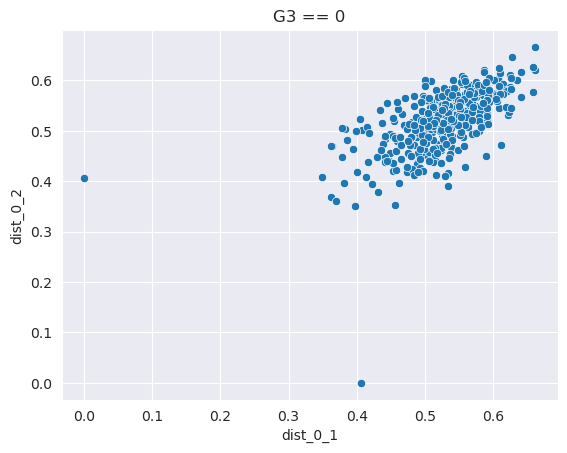

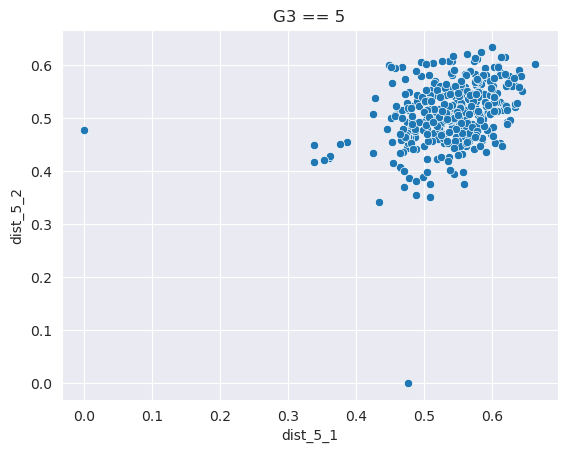

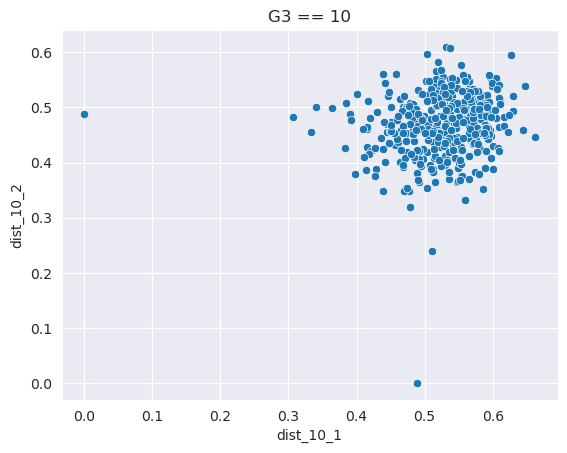

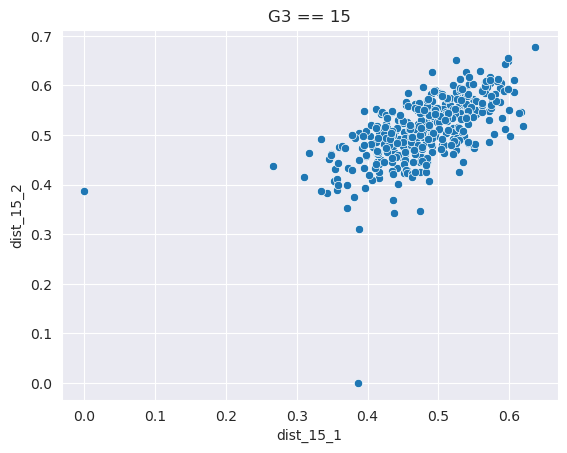

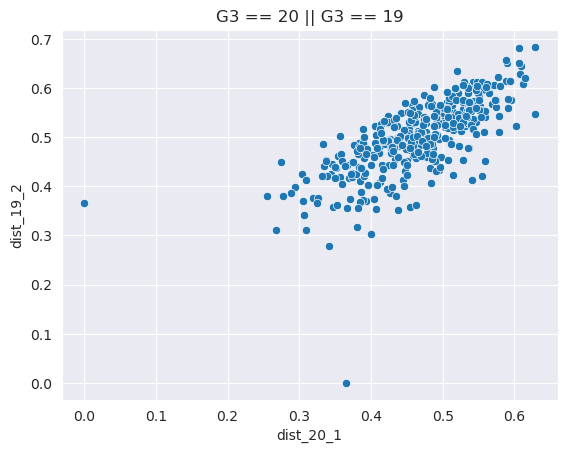

In [13]:
# Строим графики по расстоянию от всех учеников до двух выбранных для каждого кластера
# G3 == 0
x = diff_matrix[389]
y = diff_matrix[387]

ax = sns.scatterplot(x=x, y=y);
ax.set(xlabel ='dist_0_1', ylabel ='dist_0_2')
plt.title('G3 == 0');
plt.show()

# G3 == 5
x = diff_matrix[384]
y = diff_matrix[373]

ax = sns.scatterplot(x=x, y=y);
ax.set(xlabel ='dist_5_1', ylabel ='dist_5_2')
plt.title('G3 == 5');
plt.show()

# G3 == 10
x = diff_matrix[393]
y = diff_matrix[382]

ax = sns.scatterplot(x=x, y=y);
ax.set(xlabel ='dist_10_1', ylabel ='dist_10_2')
plt.title('G3 == 10');
plt.show()

# G3 == 15
x = diff_matrix[378]
y = diff_matrix[376]

ax = sns.scatterplot(x=x, y=y);
ax.set(xlabel ='dist_15_1', ylabel ='dist_15_2')
plt.title('G3 == 15');
plt.show()

# G3 == 20 || G3 == 19
x = diff_matrix[47]
y = diff_matrix[110]

ax = sns.scatterplot(x=x, y=y);
ax.set(xlabel ='dist_20_1', ylabel ='dist_19_2')
plt.title('G3 == 20 || G3 == 19');
plt.show()


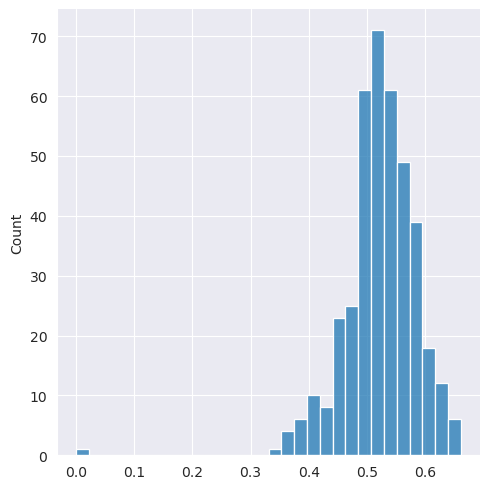

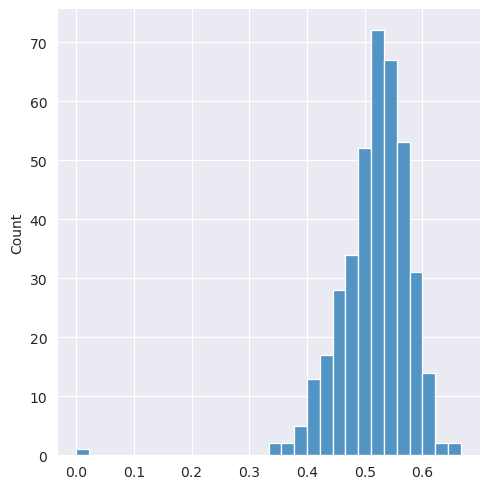

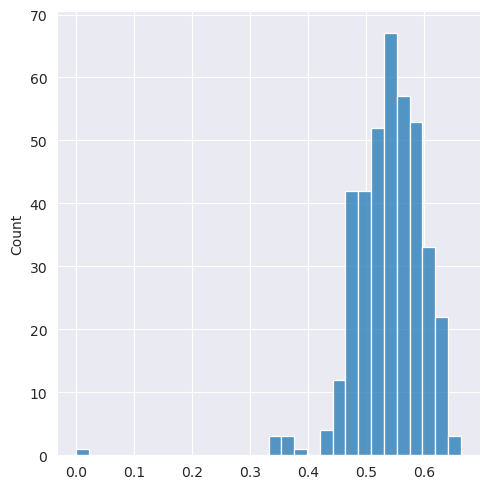

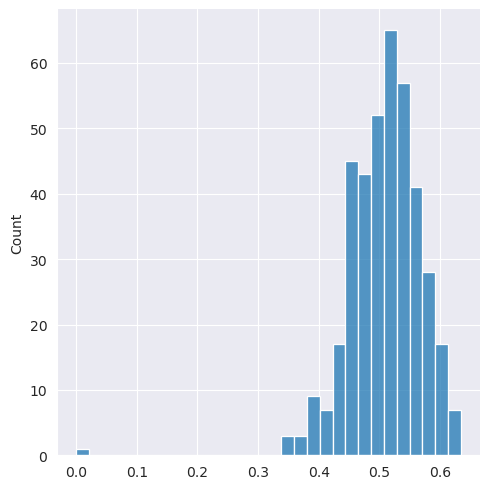

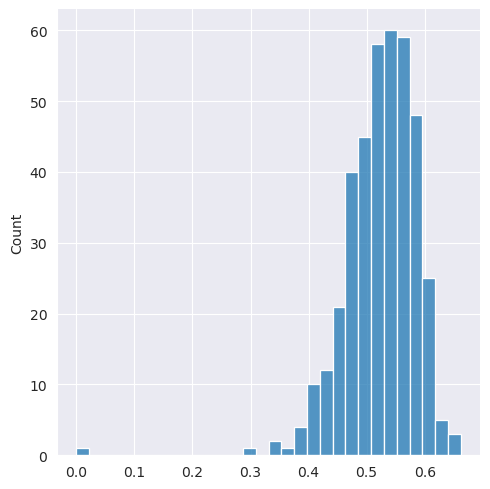

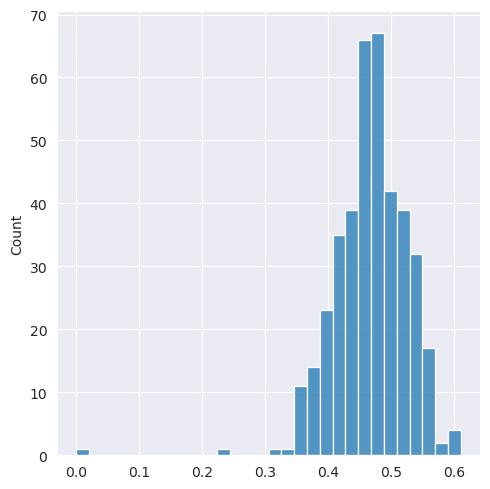

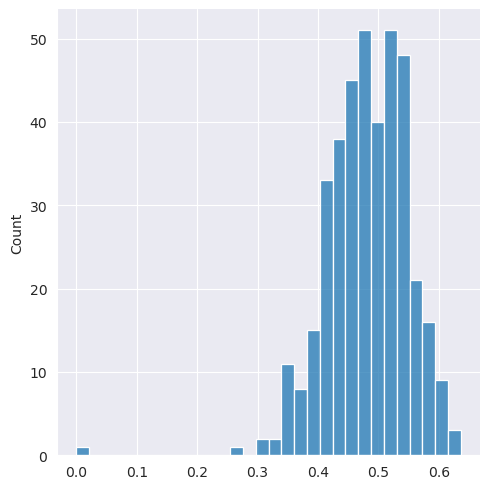

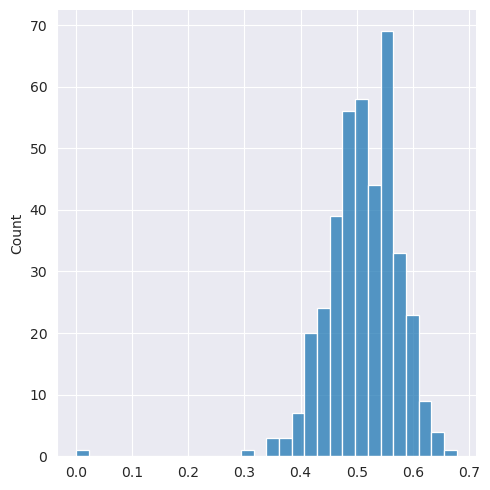

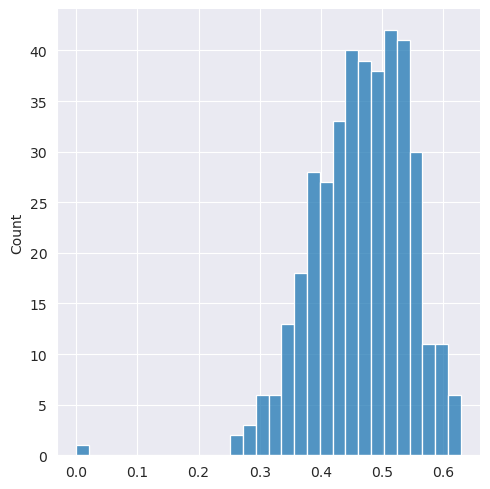

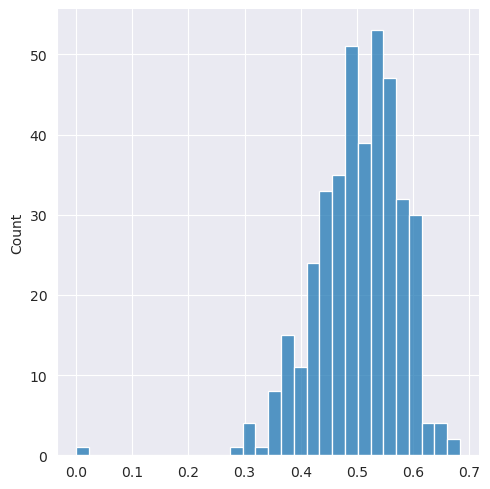

In [14]:
#sns.set_style('whitegrid')

# оценка 0
x_0_1 = diff_matrix[389]
x_0_2 = diff_matrix[387]

sns.displot(x=x_0_1, bins = 30)
sns.displot(x=x_0_2, bins = 30)

# оценка 5
x_5_1 = diff_matrix[384]
x_5_2 = diff_matrix[373]

sns.displot(x=x_5_1, bins = 30)
sns.displot(x=x_5_2, bins = 30)


# оценка 10
x_10_1 = diff_matrix[393]
x_10_2 = diff_matrix[382]

sns.displot(x=x_10_1, bins = 30)
sns.displot(x=x_10_2, bins = 30)

# оценка 15
x_15_1 = diff_matrix[378]
x_15_2 = diff_matrix[376]

sns.displot(x=x_15_1, bins = 30)
sns.displot(x=x_15_2, bins = 30)

# оценка 20 и 19
x_20_1 = diff_matrix[47]
x_19_1 = diff_matrix[110]

sns.displot(x=x_20_1, bins = 30)
sns.displot(x=x_19_1, bins = 30)


In [15]:
# 0 1 2 3 | 4 5 6 7 | 8 9 10 11 12 | 13 14 15 16 | 17 18 19 20

null_three = []
four_seven = []
eight_twelve = []
thirteen_sixteen = []
seventeen_twenty = []

#fts = [academic_level_data.iloc[:,i] for i in range(academic_level_data.shape[1])]


for i in range(academic_level_data.shape[0]):
    grade = academic_level_data.values[i][-1]
    if grade <= 3:
        null_three.append(i)
    elif grade <= 7:
        four_seven.append(i)
    elif grade <= 12:
        eight_twelve.append(i)
    elif grade <= 16:
        thirteen_sixteen.append(i)
    else:
        seventeen_twenty.append(i)

#print(null_three)

for smps in (null_three, four_seven, eight_twelve, thirteen_sixteen, seventeen_twenty):
    dst = 0
    count = 0
    for i in smps:
        for j in smps:
            if (j > i):
                dst += diff_matrix[i][j]
                count += 1




    print(f"{dst / count} - среднее расстояние внутри класса")

dst = 0
count = 0
for i in range(diff_matrix.shape[0]):
    for j in range(i, diff_matrix.shape[0], 1):
        dst += diff_matrix[i][j]
        count += 1
print(f"{dst / count} - общее среднее расстояние ")




0.4637526846002818 - среднее расстояние внутри класса
0.4736443251834031 - среднее расстояние внутри класса
0.47225816498761547 - среднее расстояние внутри класса
0.44552934548042666 - среднее расстояние внутри класса
0.4308108940914069 - среднее расстояние внутри класса
0.4745914803767301 - общее среднее расстояние 


In [16]:
# Преобразование в датасете строкового типа к численному.
# Бинарные признаки кодируем 0,1
binary_features = {'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'}
for i in binary_features:
    academic_level_data[i] = academic_level_data[i].astype('category')
    academic_level_data[i] = academic_level_data[i].cat.codes

# Бинаризуем небинарные признаки
not_binary_features = {'Mjob', 'Fjob', 'reason', 'guardian'}

for i in not_binary_features:
    academic_level_data = pd.get_dummies(academic_level_data, columns=[i])

In [17]:
df_arr = np.array(academic_level_data)
academic_level_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,0,0,18,1,0,0,4,4,2,2,...,1,1,0,0,0,1,0,0,0,0
1,0,0,17,1,0,1,1,1,1,2,...,0,1,0,0,0,1,0,0,0,0
2,0,0,15,1,1,1,1,1,1,2,...,0,0,0,1,0,1,0,0,0,0
3,0,0,15,1,0,1,4,2,1,3,...,0,0,1,0,0,0,1,0,0,0
4,0,0,16,1,0,1,3,3,1,2,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,...,0,1,0,0,0,0,0,0,1,0
391,1,1,17,1,1,1,3,1,2,1,...,0,1,0,0,0,0,0,0,1,0
392,1,1,21,0,0,1,1,1,1,1,...,0,1,0,0,0,0,0,1,0,0
393,1,1,18,0,1,1,3,2,3,1,...,0,1,0,0,0,0,0,0,1,0


In [18]:
# подсчет начального положения центроид
# seed - значение центройды по умолчанию
def kmeanspp(df_arr, k, seed=0):
    centroids = []

    # вначале центройда с нулевыми координатами
    np.random.seed(seed)
    centroid_id = np.random.choice(df_arr.shape[0])
    centroids.append(df_arr[centroid_id])

    #
    for _ in range(k-1):
        dists = []
        for x in df_arr:
            distances = np.linalg.norm((centroids - x).astype(float), axis=1)
            dists.append(distances.min())

        obj_ind = np.array(dists).argmax()
        next_centroid = df_arr[obj_ind]
        centroids.append(next_centroid)

    return centroids

In [19]:
# Обучение модели кластеризации
# X - выборка
# k - количество кластеров
# num_iter - максимальное количество итераций обучения
# min_distance - если центройды после цикла обучения сдвинулись < min_distance, то нет смысла дальше обучать модель
# seed - значение центройды по умолчанию
# centroids - начальное положение центройд (можно не указывать, тогда kmeanspp(X, k=k, seed=seed))

def KMeans(X, k, num_iter=10, min_distance=1e-4, seed=0, centroids=None):
    print(X)
    # иницализация центройд как в методе k-mean++
    if centroids is None:
        centroids = kmeanspp(X, k=k, seed=seed)

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        # Вычисление расстояние до ближайшей центройды
        # Добавление точки в тот кластер, центройда которого ближе
        for x in X:
            distances = np.linalg.norm((centroids - x).astype(float), axis=1)

            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        # Обновление положения центройд
        # Центройда должна стремиться к точке [среднее по X для точек этого кластера, среднее по Y для точек этого кластера]
        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        # Проверка на то, что центройды действительно значительно поменяли свое положение
        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        # Если хотябы одна центройда была сдвинута более чем на min_distance, то продолжаем
        # Иначе заканчиваем обучение
        if is_stop:
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [20]:
inertias = [] # Инерция: это сумма квадратов расстояний выборок до их ближайшего центра кластера.
N = 20
# Метод локтя. Мы каждый раз создаем модел с большим количеством кластеров
for i in range(1, N):
    centroids, clusters = KMeans(df_arr, k=i)

    dists = 0
    for i in clusters:
        for x in clusters[i]:
            dists += np.linalg.norm(x - centroids[i]) ** 2

    inertias.append(dists)

[[ 0  0 18 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 1  1 21 ...  1  0  0]
 [ 1  1 18 ...  0  1  0]
 [ 1  1 19 ...  1  0  0]]
[[ 0  0 18 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 1  1 21 ...  1  0  0]
 [ 1  1 18 ...  0  1  0]
 [ 1  1 19 ...  1  0  0]]
[[ 0  0 18 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 1  1 21 ...  1  0  0]
 [ 1  1 18 ...  0  1  0]
 [ 1  1 19 ...  1  0  0]]
[[ 0  0 18 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 1  1 21 ...  1  0  0]
 [ 1  1 18 ...  0  1  0]
 [ 1  1 19 ...  1  0  0]]
[[ 0  0 18 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 1  1 21 ...  1  0  0]
 [ 1  1 18 ...  0  1  0]
 [ 1  1 19 ...  1  0  0]]
[[ 0  0 18 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 1  1 21 ...  1  0  0]
 [ 1  1 18 ...  0  1  0]
 [ 1  1 19 ...  1  0  0]]
[[ 0  0 18 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 [ 0  0 15 ...

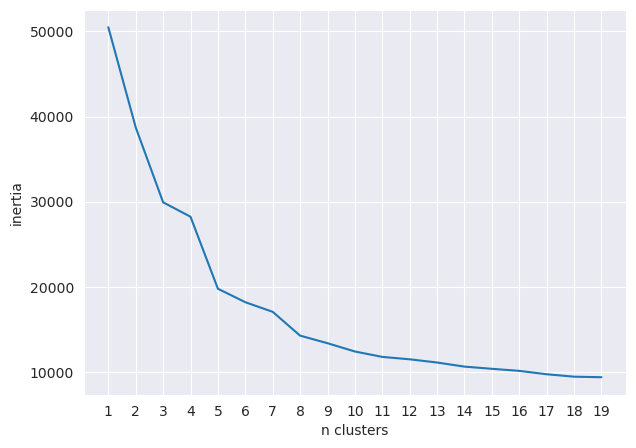

In [21]:
plt.figure(figsize=(7, 5))
plt.plot(inertias)
plt.xticks(np.arange(0, N - 1), np.arange(1, N))
plt.xlabel('n clusters')
plt.ylabel('inertia');

In [22]:
result = 0
# последний столбец с баллами
G3_column: pd.Series = academic_level_data["G3"]

for i, row in enumerate(diff_matrix):
    nearest_obj_idx = np.argmin(np.delete(row, 0))
    # нужно прибавлять единицу, так как мы удаляем 0 из каждой строчки
    if nearest_obj_idx >= i:
        nearest_obj_idx += 1

    G3_i_value: int = G3_column[i]
    G3_nearest_obj_value: int = G3_column[nearest_obj_idx]
    # проверяем, что ближайшие объекты относятся к одному классу. А именно либо >= 10, либо < 10
    if (G3_i_value >= 10 and G3_nearest_obj_value >= 10) or (G3_i_value < 10 and G3_nearest_obj_value < 10):
        result += 1

print(f"{result / diff_matrix.shape[0] * 100.0:.2f}%")

55.44%


In [23]:
academic_level_data['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64